In [95]:
# Task to carry out: This dataset contains information collected by the US 
# Census Service concerning housing in the area of Boston, MA. The dataset 
# is small, with only 506 cases. Here are the variables captured in this dataset:  
#
#     CRIM – per capita crime rate by town  
#     ZN – proportion of residential land zoned for lots over  25,000 sq.ft.  
#     INDUS – proportion of non-retail business acres per town  
#     CHAS – Charles River dummy variable (1 if tract bounds  river; 0 otherwise)
#     NOX – nitric oxides concentration (parts per 10 million)  
#     RM – average number of rooms per dwelling  
#     AGE – proportion of owner-occupied units built prior to  1940  
#     DIS – weighted distances to five Boston employment centers  
#     RAD – index of accessibility to radial highways  
#     TAX – full-value property-tax rate per $10,000  
#     PTRATIO – pupil–teacher ratio by town  
#     B – 1000(Bk – 0.63)2 where Bk is the proportion of  Black people by town  
#     LSTAT -% lower status of the population  
#     MEDV – Median value of owner-occupied homes in $1000s  
#
# TASKS:
#
# Using appropriate correlation and regression tests, find which of 
# the variables is the best predictor of NOX  (nitric oxides concentration).
# For that model, provide the regression plot and equation.  
# 
# Using appropriate correlation and regression tests, find which of 
# the variables is the best predictor of MEDV  (median home value). For 
# that model, provide the regression plot and equation. 

In [96]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset

df = pd.read_csv('Boston.csv', index_col=0)

# Print the correlation between 

print("Correlation coefficient between 'crim' and 'nox':", 
      np.corrcoef(df.crim, df.nox)[0, 1])
print("Correlation coefficient between 'zn' and 'nox':", 
      np.corrcoef(df.zn, df.nox)[0, 1])
print("Correlation coefficient between 'indus' and 'nox':", 
      np.corrcoef(df.indus, df.nox)[0, 1])
print("Correlation coefficient between 'chas' and 'nox':", 
      np.corrcoef(df.chas, df.nox)[0, 1])
print("Correlation coefficient between 'rm' and 'nox':", 
      np.corrcoef(df.rm, df.nox)[0, 1])
print("Correlation coefficient between 'age' and 'nox':", 
      np.corrcoef(df.age, df.nox)[0, 1])
print("Correlation coefficient between 'dis' and 'nox':", 
      np.corrcoef(df.dis, df.nox)[0, 1])
print("Correlation coefficient between 'rad' and 'nox':", 
      np.corrcoef(df.rad, df.nox)[0, 1])
print("Correlation coefficient between 'tax' and 'nox':", 
      np.corrcoef(df.tax, df.nox)[0, 1])
print("Correlation coefficient between 'ptratio' and 'nox':", 
      np.corrcoef(df.ptratio, df.nox)[0, 1])
print("Correlation coefficient between 'black' and 'nox':", 
      np.corrcoef(df.black, df.nox)[0, 1])
print("Correlation coefficient between 'lstat' and 'nox':", 
      np.corrcoef(df.lstat, df.nox)[0, 1])
print("Correlation coefficient between 'medv' and 'nox':", 
      np.corrcoef(df.medv, df.nox)[0, 1])

corr_coefs = [np.corrcoef(df.crim, df.nox)[0, 1]]
corr_coefs.append(np.corrcoef(df.zn, df.nox)[0, 1])
corr_coefs.append(np.corrcoef(df.indus, df.nox)[0, 1])
corr_coefs.append(np.corrcoef(df.chas, df.nox)[0, 1])
corr_coefs.append(np.corrcoef(df.rm, df.nox)[0, 1])
corr_coefs.append(np.corrcoef(df.age, df.nox)[0, 1])
corr_coefs.append(np.corrcoef(df.dis, df.nox)[0, 1])
corr_coefs.append(np.corrcoef(df.rad, df.nox)[0, 1])
corr_coefs.append(np.corrcoef(df.tax, df.nox)[0, 1])
corr_coefs.append(np.corrcoef(df.ptratio, df.nox)[0, 1])
corr_coefs.append(np.corrcoef(df.black, df.nox)[0, 1])
corr_coefs.append(np.corrcoef(df.lstat, df.nox)[0, 1])
corr_coefs.append(np.corrcoef(df.medv, df.nox)[0, 1])

print("\nMaximum correlation: ", max(corr_coefs))
print("Minimum correlation:", min(corr_coefs))

# We can see that the strongest correlation is -.769, meaning the 'dis' variable is most strongly correlated 
# with the nox variable. Since this is a negative correlation, that means that as dis increases, nox decreases.

Correlation coefficient between 'crim' and 'nox': 0.4209717113924563
Correlation coefficient between 'zn' and 'nox': -0.5166037078279846
Correlation coefficient between 'indus' and 'nox': 0.763651446920914
Correlation coefficient between 'chas' and 'nox': 0.09120280684249556
Correlation coefficient between 'rm' and 'nox': -0.30218818784959367
Correlation coefficient between 'age' and 'nox': 0.7314701037859591
Correlation coefficient between 'dis' and 'nox': -0.7692301132258278
Correlation coefficient between 'rad' and 'nox': 0.6114405634855764
Correlation coefficient between 'tax' and 'nox': 0.6680232004030223
Correlation coefficient between 'ptratio' and 'nox': 0.18893267711276668
Correlation coefficient between 'black' and 'nox': -0.3800506377924003
Correlation coefficient between 'lstat' and 'nox': 0.5908789208808463
Correlation coefficient between 'medv' and 'nox': -0.4273207723732826

Maximum correlation:  0.763651446920914
Minimum correlation: -0.7692301132258278


In [97]:
# Prepare the data for regression analysis

X = df.dis  # Independent variable
y = df.nox  # Dependent variable
X = sm.add_constant(X)  # Adds the constant term to the predictor 

# Fit the linear regression model

lr_model = sm.OLS(y, X).fit()

# Print the summary of the linear regression model

print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    nox   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     730.4
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          4.23e-100
Time:                        20:30:00   Log-Likelihood:                 599.69
No. Observations:                 506   AIC:                            -1195.
Df Residuals:                     504   BIC:                            -1187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7153      0.007    105.257      0.0

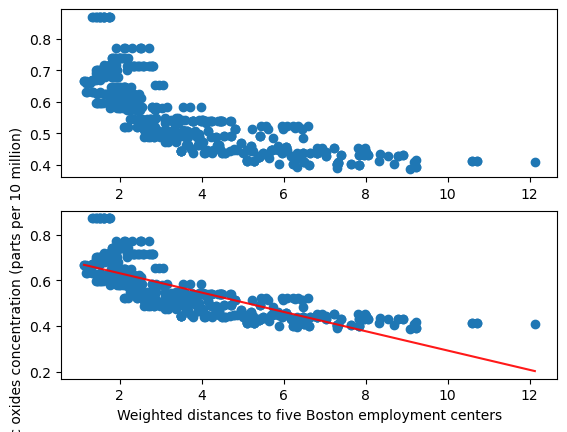

In [98]:
# From the results, the values of coefficients can be found, one for const (constant) and the other for dis
# Thus, our regression equation is:
#
#   nox = const + coeff * dis
#
# using the actual values from the results of our regression analysis:
#
#   nox = .7153 + -0.0423 * dis
#

# Pick 100 points equally spaced from the min to the max

X_prime = np.linspace(X.dis.min(), X.dis.max(), 100)
X_prime = sm.add_constant(X_prime) # Add a constant

# Now calculate predicted values

y_hat = lr_model.predict(X_prime)

# Scatter plot of raw data, and scatter plot of regression line

plt.figure(1)
plt.subplot(211)
plt.scatter(df.dis, df.nox)
plt.subplot(212)
plt.scatter(X.dis, y) # Plot the raw data
plt.xlabel("Weighted distances to five Boston employment centers")
plt.ylabel("Nitric oxides concentration (parts per 10 million)")
plt.plot(X_prime[:, 1], y_hat, "red", alpha = 0.9) # Add the regression line in red

In [99]:
# Print the correlation between 

print("Correlation coefficient between 'crim' and 'medv':", 
      np.corrcoef(df.crim, df.medv)[0, 1])
print("Correlation coefficient between 'zn' and 'medv':", 
      np.corrcoef(df.zn, df.medv)[0, 1])
print("Correlation coefficient between 'indus' and 'medv':", 
      np.corrcoef(df.indus, df.medv)[0, 1])
print("Correlation coefficient between 'chas' and 'medv':", 
      np.corrcoef(df.chas, df.medv)[0, 1])
print("Correlation coefficient between 'rm' and 'medv':", 
      np.corrcoef(df.rm, df.medv)[0, 1])
print("Correlation coefficient between 'age' and 'medv':", 
      np.corrcoef(df.age, df.medv)[0, 1])
print("Correlation coefficient between 'dis' and 'medv':", 
      np.corrcoef(df.dis, df.medv)[0, 1])
print("Correlation coefficient between 'rad' and 'medv':", 
      np.corrcoef(df.rad, df.medv)[0, 1])
print("Correlation coefficient between 'tax' and 'medv':", 
      np.corrcoef(df.tax, df.medv)[0, 1])
print("Correlation coefficient between 'ptratio' and 'medv':", 
      np.corrcoef(df.ptratio, df.medv)[0, 1])
print("Correlation coefficient between 'black' and 'medv':", 
      np.corrcoef(df.black, df.medv)[0, 1])
print("Correlation coefficient between 'lstat' and 'medv':", 
      np.corrcoef(df.lstat, df.medv)[0, 1])
print("Correlation coefficient between 'nox' and 'medv':", 
      np.corrcoef(df.nox, df.medv)[0, 1])

corr_coefs = [np.corrcoef(df.crim, df.medv)[0, 1]]
corr_coefs.append(np.corrcoef(df.zn, df.medv)[0, 1])
corr_coefs.append(np.corrcoef(df.indus, df.medv)[0, 1])
corr_coefs.append(np.corrcoef(df.chas, df.medv)[0, 1])
corr_coefs.append(np.corrcoef(df.rm, df.medv)[0, 1])
corr_coefs.append(np.corrcoef(df.age, df.medv)[0, 1])
corr_coefs.append(np.corrcoef(df.dis, df.medv)[0, 1])
corr_coefs.append(np.corrcoef(df.rad, df.medv)[0, 1])
corr_coefs.append(np.corrcoef(df.tax, df.medv)[0, 1])
corr_coefs.append(np.corrcoef(df.ptratio, df.medv)[0, 1])
corr_coefs.append(np.corrcoef(df.black, df.medv)[0, 1])
corr_coefs.append(np.corrcoef(df.lstat, df.medv)[0, 1])
corr_coefs.append(np.corrcoef(df.nox, df.medv)[0, 1])

print("\nMaximum correlation: ", max(corr_coefs))
print("Minimum correlation:", min(corr_coefs))

# We can see that the strongest correlation is -.737, meaning the 'lstat' variable is most strongly correlated 
# with the medv variable. Since this is a negative correlation, that means that as lstat increases, medv decreases.

Correlation coefficient between 'crim' and 'medv': -0.38830460858681143
Correlation coefficient between 'zn' and 'medv': 0.3604453424505435
Correlation coefficient between 'indus' and 'medv': -0.48372516002837357
Correlation coefficient between 'chas' and 'medv': 0.1752601771902987
Correlation coefficient between 'rm' and 'medv': 0.6953599470715393
Correlation coefficient between 'age' and 'medv': -0.37695456500459623
Correlation coefficient between 'dis' and 'medv': 0.24992873408590394
Correlation coefficient between 'rad' and 'medv': -0.3816262306397775
Correlation coefficient between 'tax' and 'medv': -0.46853593356776685
Correlation coefficient between 'ptratio' and 'medv': -0.5077866855375616
Correlation coefficient between 'black' and 'medv': 0.3334608196570666
Correlation coefficient between 'lstat' and 'medv': -0.7376627261740151
Correlation coefficient between 'nox' and 'medv': -0.4273207723732826

Maximum correlation:  0.6953599470715393
Minimum correlation: -0.73766272617401

In [100]:
# Prepare the data for regression analysis

X = df.lstat  # Independent variable
y = df.medv  # Dependent variable
X = sm.add_constant(X)  # Adds the constant term to the predictor 

# Fit the linear regression model

lr_model = sm.OLS(y, X).fit()

# Print the summary of the linear regression model

print(lr_model.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           5.08e-88
Time:                        20:30:01   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

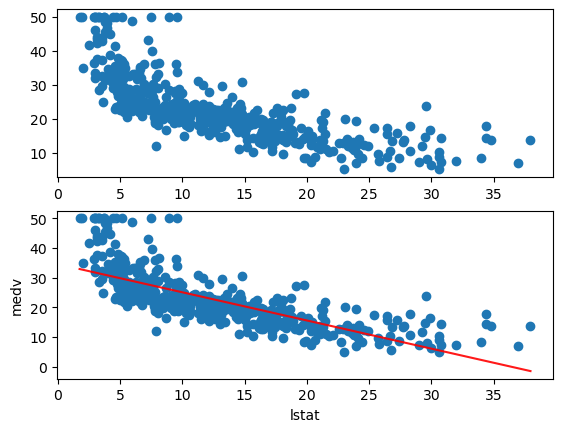

In [101]:
# From the results, the values of coefficients can be found, one for const (constant) and the other for lstat
# Thus, our regression equation is:
#
#   medv = const + coeff * lstat
#
# using the actual values from the results of our regression analysis:
#
#   medv = 34.5538 + -0.9500 * lstat
#

# Pick 100 points equally spaced from the min to the max

X_prime = np.linspace(X.lstat.min(), X.lstat.max(), 100)
X_prime = sm.add_constant(X_prime) # Add a constant

# Now calculate predicted values

y_hat = lr_model.predict(X_prime)

# Scatter plot of raw data, and scatter plot of regression line

plt.figure(1)
plt.subplot(211)
plt.scatter(df.lstat, df.medv)
plt.subplot(212)
plt.scatter(X.lstat, y) # Plot the raw data
plt.xlabel("lstat")
plt.ylabel("medv")
plt.plot(X_prime[:, 1], y_hat, "red", alpha = 0.9) # Add the regression line in red